# 14. Describing Data

> "Facts are stubborn things, but statistics are pliable.” ~ Mark Twain

> “Most people use statistics like a drunk man uses a lamppost; more for support than illumination” ~ Andrew Lang

> “Statistics don't determine whether you find love or get married. You do!” ~ Suzette Vearnon 

![inequality](https://i1.wp.com/flowingdata.com/wp-content/uploads/2020/12/Tudor-Networks.png?resize=1536%2C1439&ssl=1)
**Source:** [Tudor Networks by Kim Albrecht, Ruth Ahnert, and Sebastian Ahnert](http://tudornetworks.net/)

**What are descriptive statistics?**

Descriptive Statistics is the process of describing and presenting your data. This is usually done through tables, visualisations and written descriptions of data. For example, if you conduct a survey to find out how much people like a particular brand, you will want to report the number of people that took the survey (the count), the average, minimum, and maximum age or even the median income of every respondant. With these data alone, we could move onto to making more informed and important decisions.

In the previous survey example, every survey taker would be a row, and every question in that survey would form the columns (see the table below). Income, age, and favourite brand, would all represent different arrays or vectors of information in a two-dimensional matrix or dataset.

|    Name   |   Income  |  Age  | Favourite Brand |
|-----------|-----------|-------|-----------------|
|  Abraham  |   70,000  |   25  |   Nike          |
|  Lisa     |  110,000  |   31  |   Apple         |
|  Mark     |   80,000  |   24  |   Garmin        |
|  Penelope |   55,000  |   49  |   Microsoft     |
|  Michaela |   74,000  |   51  |   ZARA          |
|  Nicholas |   61,000  |   36  |   Adiddas       |

Every one of these arrays can represent a categrorical or quantitative variable. Since data are often messy and even unstructured, we might also find other data structures, or free text (long strings) as the elements of a table like the one above. For the most part though, we will focus on the two types of variables we will often see, quantitative and categorical variables to describe our dataset.

Descriptive statistics are often shown through tables and visualisations. For example, imagine you'd like to know how the average life expectancy of people at age 60 in different countries has changed over time. That visualisation would look like the one below.

![life_exp](pictures/live_exp.png)

__So what should we look for when we want to describe data?__ We want to look for information that gives us facts about the data, such as the most common value of a set of characteristics, how far is a given value in a variable from the average value of that same variable (e.g. how far is the age of a teacher selected at random in all the schools in Sydney from the average age of all teachers in New South Wales). These two kinds of values, the average of a set and the variability of each value in a set, are part of what is known as measures of central tendency and measures of variability, respectively.

__Measures of Central tendency__, also classified as summary statistics, are calculations that help us describe any data point in our dataset in relation to the most common values. The most common determinants of central tendency are the mean, median, and mode.

__Measures of Variability__ tell us how spread-out our data is. Think about this as how much variation there is, whether up or down, in the income of your closest friends to that of the income of the average Australian. That distance from the income of your friends to the most common income (the average of all) gives us insights as to how much income variability there is in the entire population of Australia. In this instance, your friends would be consider a sample of the population. The most common measures of variability are the range, variance and standard deviation.

**How do we describe categories and quantities?**

Categorical variables can be shown using frequency tables and visualisations where each category of the variable is given a number representing the amount of times that category was found in the dataset. For example, a question in a survey containing answer choices ranging from Strongly Agree to Strongly Disagree will have 5 categories.

Quantitative variables, on the other hand, can be summarised with averages, percentiles, scatterplots, etc., and tend to provide different perspectives and insights than qualitative variables.

The most useful set of facts we will need will often come from a combination of both, qualitative and quantitative variables. Nontheless, Descriptive Statistics are not only an essential step in the data analytics cycle but are also specially useful when we have a lot of data and want to convey relevant a message with relevant information fast.

Let's go over each one of the most important descriptive statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import check_or_add
import os

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Setting pandas fload option to 5 decimal places helps us get rid of scientific notation
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline
%load_ext autoreload

In [2]:
path = '../data'

# for windows users
# path = '..\data'

In [3]:
parquet_file = os.path.join(check_or_add(path, 'clean_parquet'), 'clean_airbnb.parquet')

In [4]:
# csv_file = os.path.join(check_or_add(path, 'clean_csv'), 'clean_airbnb.csv')

In [5]:
df = pd.read_parquet(parquet_file)

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39742 entries, 12602 to 12848
Data columns (total 95 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39742 non-null  object 
 1   listing_url                                   39742 non-null  object 
 2   scrape_id                                     39742 non-null  object 
 3   last_scraped                                  39742 non-null  object 
 4   name                                          39742 non-null  object 
 5   summary                                       39742 non-null  object 
 6   space                                         39742 non-null  object 
 7   description                                   39742 non-null  object 
 8   experiences_offered                           39742 non-null  object 
 9   neighborhood_overview                         39742 non-n

In [7]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,first_review,last_review,latitude,longitude,bathrooms,price,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,accommodates,guests_included,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,bedrooms,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_listings_count,host_total_listings_count,security_deposit,review_scores_checkin,reviews_per_month,host_response_rate,host_acceptance_rate,review_scores_rating,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_communication,review_scores_location,cleaning_fee
12602,41601240,https://www.airbnb.com/rooms/41601240,20200625032351,2020-06-26,5 min Sta.!!Easy access to Ueno/Akihabara☆max6...,Located in a real residential area where the n...,"Welcome to Tabata, Tokyo! The apartment is lo...",Located in a real residential area where the n...,none,It says that many super famous Japanese author...,I'll send the guidance of the way to the apart...,★Closest stations★ ･田端駅(Tabata Sta.) - 山手線(Ya...,You have full access to the apartment. Nothin...,I live in different apartment in TOKYO. If yo...,Unknown,https://a0.muscache.com/im/pictures/03bcbfe3-6...,287699302,https://www.airbnb.com/users/show/287699302,Nana,2019-08-21,JP,Hey I’m Nana.\r\nThanks for taking the time to...,within an hour,t,https://a0.muscache.com/im/pictures/user/1de4e...,https://a0.muscache.com/im/pictures/user/1de4e...,"['email', 'phone', 'offline_government_id', 's...",t,f,"Kita City, Tōkyō-to, Japan",Kita Ku,Kita City,Tōkyō-to,114-0014,Tokyo,"Kita City, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Washer,""Sm...",2,1125,4 weeks ago,t,2020-06-26,t,t,f,strict_14_with_grace_period,f,f,2020-01-30,2020-03-30,35.735,139.758,1.000,479.510,0.000,7.300,1125.000,6,1,2,30,1125,1125,15,45,75,349,4,4,7,7,2,3,0,0,7,7,0.000,10.000,0.810,100.000,100.000,100.000,10.000,9.000,10.000,10.000,10.000,134.400
1171,16008291,https://www.airbnb.com/rooms/16008291,20200625032351,2020-06-26,4min Shinjuku st/Cozy&Clean/2min walk JR Okubo...,OPENING SALE!!! IN WINTER 2016 My apartment i...,☆This my new apartment is located amazing plac...,OPENING SALE!!! IN WINTER 2016 My apartment i...,none,Unknown,Notice: I DON'T ACCEPT ANY BABYS. PLEASE KEEP ...,JR OKUBO station>>>>2min walk JR SHIN-OKUBO st...,Entire room.,"Basically, I would like to meet you and give t...","Please relax at your home in Tokyo, but please...",https://a0.muscache.com/im/pictures/139b4b2c-c...,98770436,https://www.airbnb.com/users/show/98770436,Tom,2016-10-08,"Shinjuku, Tokyo, Japan","Hi Everyone,\r\nThank you for visiting my list...",within an hour,t,https://a0.muscache.com/im/pictures/user/6bf41...,https://a0.muscache.com/im/pictures/user/6bf41...,"['email', 'phone', 'reviews']",t,f,"Shinjuku-ku, Tōkyō-to, Japan",Shinjuku Ku,Shinjuku-ku,Tōkyō-to,169-0074,Tokyo,"Shinjuku-ku, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",1,20,4 weeks ago,t,202

## Count

 We will need to know how many observations (also known as the n count) are in our dataset and that is exactly what `len()` gives us. We pass an array of values through the function and it returns the number of all values in that array. `len()` also takes in strings and gives us back the total number of elements inside a string. Please note, counting and adding several numbers is not the same. To put this into perspective, think about what the average represents, the nominator is a sum of all the elements in an array while the denominator is the amount of elements in such array.

In [8]:
len(df)

39742

In [9]:
df.shape[1]

95

We can also count specific categories visually with seaborn.

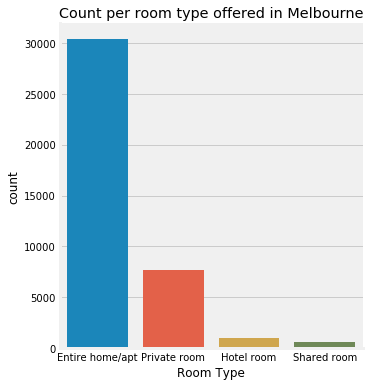

In [10]:
sns.catplot(x='room_type', data=df, kind='count')
plt.xlabel("Room Type")
plt.title("Count per room type offered in Melbourne")
plt.show()

## Mean

What we call the mean is actually the arithmetic mean. This is the sum of all the values in a set or array, divided by the amount of numbers in such array. While zeros are always counted in the arithmetic mean, in Python, empty values or `NaN`s are never counted towards that or any other operation.

$\overline{X}=\dfrac{1}{n}\sum x_{i}$

In the folmula above, 
- $\overline{X}$ stands for the mean of array X
- **$n$** is the lenght of the array, vector, set, or list
- $\dfrac{1}{n}$ means we will divide everything by the lenght
- The greek letter $\sum$ denotes the sumation of all proceding values
- $x_{i}$ means every value in the array starting from **$i$**, and **$i$** in this instance can be any number

We can observe the mean of some of the quantitative variables in our dataframe with the method `.mean()`.

In [11]:
some_numerical_vars = ['bathrooms', 'price', 'extra_people', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']

In [12]:
df[some_numerical_vars].mean()

bathrooms                   1.552
price                     188.614
extra_people                8.924
minimum_nights_avg_ntm      4.328
maximum_nights_avg_ntm   1069.295
dtype: float32

In [13]:
# the same works with np methods
np.mean(df[some_numerical_vars])

bathrooms                   1.552
price                     188.614
extra_people                8.924
minimum_nights_avg_ntm      4.328
maximum_nights_avg_ntm   1069.295
dtype: float32

We can also calculate the mean ourselves with plain Python code.

In [14]:
sum(df['price']) / len(df)

188.61534042750984

## Median

The median will order an array of numbers from lowest to highest and select the number in the middle. This means that the median is effectively the 50th percentile of any array. If the array has an even amount of numbers, it will return the average of the middle two numbers. If the arrays has an odd amount of numbers, it will return the one in the middle.

Just like with the `.mean()` method, we can use the `.median()` method on the quantitative variables of our dataframe and pandas will return the median for all variables. We could also use the `.median()` method and it will return the a median value for all numerical variables in our dataset. This is not recommended if your dataset is too large and has a lot of variables.

In [15]:
more_numerical_vars = ['accommodates', 'guests_included', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                      'maximum_maximum_nights', 'availability_30', 'availability_60', 'availability_90']

In [16]:
df[more_numerical_vars].median()

accommodates                4.000
guests_included             1.000
minimum_minimum_nights      2.000
maximum_minimum_nights      2.000
minimum_maximum_nights   1125.000
maximum_maximum_nights   1125.000
availability_30            24.000
availability_60            52.000
availability_90            80.000
dtype: float64

Say we know that our `price` array has an odd number of elements and we want to get the value at the 50th percentile of our variable. We could, for instance, pass in a slice that selects that same middle numberof the array by computing floor division on the lenght of the array. The reason we would use a floor division is because all divisions in Python return a float and we can't pass floats to a slice. We could, in turn, wrap `int()` around our division, or the function `round()` instead to achieve the same result. Let's have a look.

In [17]:
len(df)

39742

In [18]:
39742 / 2

19871.0

In [19]:
# if your number is even, get the lower bound
lower_bound = (len(df) // 2) - 1
lower_bound

19870

In [20]:
# if your number is even, also get the upper bound
upper_bound = (len(df) // 2)
upper_bound

19871

In [21]:
# check out the value at x bound
sorted(df['price'])[lower_bound]

84.01920318603516

In [22]:
# check out the value at x bound
sorted(df['price'])[upper_bound]

84.01920318603516

In [23]:
# confirm the true median
true_median = (sorted(df['price'])[lower_bound] + sorted(df['price'])[upper_bound]) / 2
true_median

84.01920318603516

In [24]:
np.median(df['price'])

84.0192

We can also divide normally and surround the operation with `int()` to make sure we get an integer for our slice.

In [25]:
odd_array = np.arange(9)
# odd array again
sorted(odd_array)[int(len(odd_array) / 2)]

4

In [26]:
np.median(odd_array)

4.0

To manually get the median of an even array, we need to do a bit more work. We need to

- sort the array
- create a slice for the middle number and subtract one
- add the value on the previous step to another slice without subtracting 1
- divide the result by 2

In [27]:
# even array
arr = np.random.randint(0, 200, 14)

# sum the lower and higher slicers surrounding the median and divide by 2
(sorted(arr)[len(arr) // 2 - 1] + sorted(arr)[len(arr) // 2]) / 2

91.5

In [28]:
arr

array([175, 143, 115,  92,  78, 184,   1,  10,  14, 143,  91,  47,  95,
        21])

In [29]:
np.median(arr)

91.5

Now, the above cell is illegible and does not help much. Let's decompose it step by step.

In [30]:
# first step
sorted_array = sorted(arr)
sorted_array

[1, 10, 14, 21, 47, 78, 91, 92, 95, 115, 143, 143, 175, 184]

In [31]:
# second step
array_count = len(arr)
array_count

14

In [32]:
# third step
middle_of_array = (array_count // 2)
middle_of_array

7

In [33]:
# fourth step
low_bound = sorted_array[middle_of_array - 1]
low_bound

91

In [34]:
# fifth step
upper_bound = sorted_array[middle_of_array]
upper_bound

92

In [35]:
# final step
answer = (low_bound + upper_bound) / 2
answer

91.5

In [36]:
# confirm results
np.median(arr)

91.5

## Mode

Mode is the most frequent number in an array of numbers. To get the mode we can pass the `.mode()` method to a series or we take advantage of on of the many methods in the library SciPy. (SciPy stands for scientific computing.) This library is a cousing of NumPy, or maybe a children, and it comes with many similar functionalities as the ones you would find in NumPy.

In [37]:
df['city'].mode()

0    Cape Town
dtype: object

In [38]:
# we import the mode function from scipy
from scipy.stats import mode

When we import the `mode` function we can pass it to our dataframe and it will return a scipy object with two arrays, one for the values that appear the most, and another for the times it appears the most.

In [39]:
more_cols = ['price', 'cleaning_fee', 'security_deposit', 'host_is_superhost']
mode(df[more_cols])[1]

array([[  668,  5002, 24671, 28789]])

We can pass in this structure to an `np.array()`, transpose it, and get an array of tuples with each element and its respective value next to each other.

In [40]:
np.array(mode(df[more_cols])).T

array([[[96.31680297851562, 668]],

       [[0.0, 5002]],

       [[0.0, 24671]],

       [['f', 28789]]], dtype=object)

We can confirm the median of any variable using the `.value_counts()` method.

In [41]:
df['host_is_superhost'].value_counts(normalize=True)

f   0.724
t   0.276
Name: host_is_superhost, dtype: float64

## Percentiles

Percentiles give us the value at a given location of the array. For example, `np.percentile(array, 25)` will return the number where 75% of the data is above of, and 25% of the data is below of. In contrast, `np.percentile(array, 50)` would return the median the median of the array.

In [42]:
# This answers the question, what prices am I looking within the lower quarter of the array?
np.percentile(df['price'], 25)

48.15359878540039

In [43]:
np.percentile(df['price'], 95)

555.1765747070312

In [44]:
np.median(df['price'])

84.0192

We can also get a particular percentile manually by multiplying percentages by the length of the array inside a slice of a sorted array. Think of this as masking.

In [45]:
print(f"Our fancy percentage finding scheme --> {sorted(df['cleaning_fee'])[int(0.30 * len(df))]}")
print("NumPy's version --> %f" % np.percentile(df['cleaning_fee'], 30))

Our fancy percentage finding scheme --> 15.425000190734863
NumPy's version --> 15.425000


## Range

The Range of a set is the difference between the maximum and minimum numbers of an array. Going back to our income example, if the highest-paid person in Australia made 2,000,000/year and the lowest-paid person made 500/year, then the range of that set would be the difference between the two, or 1,999,500. This is regardless of the lenght of the array as the range focuses on content not quantity of values.

We can use `np.ptp()` to get the range of a numerical array or we can compute the range ourselves in several different ways with regular Python.

In [46]:
# numpy's way
np.ptp(df['cleaning_fee'])

3146.04

In [47]:
# python's way
max(df['cleaning_fee']) - min(df['cleaning_fee'])

3146.0400390625

In [48]:
# no helper functions
sorted(df['cleaning_fee'])[-1] - sorted(df['cleaning_fee'])[0]

3146.0400390625

In [49]:
sorted(df['cleaning_fee'])[0]

0.0

In [50]:
sorted(df['cleaning_fee'])[-1]

3146.0400390625

## Variance

Variance tells us how much variation to expect in an array of data ($x$) with at least 2 numbers. For example, say we have two groups with 5 professional athletes in each. One group has soccer players and the other has tennis players. Now imagine we first ask each group how much do they spend eating out each week, and then we calculate the average of those amounts. Once we do this, we are surprised to find out that both groups of athletes spend the same on average eating out, about 570/week. Here is the data.

| Athlete | Group | Money Spent/Week |
|:-------:|:----------------:|:----------------:|
| Serena Williams | Tennis | \$570 |
| Roger Federer | Tennis | \$570 |
| Venus Williams | Tennis | \$570 |
| Rafael Nadal | Tennis | \$570 |
| Maria Sharapova | Tennis | \$570 |
| Cristiano Ronaldo | Soccer | \$700 |
| Hope Solo | Soccer | \$380 |
| Loenel Messi | Soccer | \$200 |
| Mia Hamm | Soccer | \$650 |
| Diego Maradona | Soccer | \$920 |


Although the average is the same for both groups, the variation per group and player (as seen above) is extremely large. The tennis group's variation is equal to `0` while the variation of the soccer group is much greater than that.

Here is the mathematical formula for the variance before we see it in code. To calculate it, we sum the squared difference of each data point of an array from the mean of that same array. We then divide the sum by the lenght of the array.

$\sigma^{2}=\dfrac {1}{n-1}\sum _{i}\left( x_{i}-\overline {x}\right) ^{2}$

In the folmula above, 
- $\overline{X}$ stands for the mean
- $n$ is the lenght of the array, vector, set, or list
- $\dfrac{1}{n-1}$ means we will divide everything by the lenght
- The greek letter $\sum$ denotes sumation
- $x_{i}$ means every `x` value starting from `i`. In other words, every element of the array
- $\sigma^{2}$ --> squared standard deviation, aka result
- $\left( x_{i}-\overline {x}\right) ^{2}$ means the square difference

Let's calculate the variance using different methods in Python.

In [51]:
# remember this variable
some_numerical_vars

['bathrooms',
 'price',
 'extra_people',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [52]:
# we can use a method on the entire array
df[some_numerical_vars].var()

bathrooms                         1.345
price                        304382.781
extra_people                    225.221
minimum_nights_avg_ntm          254.247
maximum_nights_avg_ntm   2516169216.000
dtype: float32

We can also use the numpy method on a one dimensional array.

In [53]:
np.var(df['minimum_nights_avg_ntm'])

254.24072265625

The last option is to do it ourselved with by coding every step of the formula.

In [54]:
df['price'].mean()

188.6138153076172

In [55]:
# first take the difference between each data point and the mean of the array
diff_var = (df['price'] - df['price'].mean())
diff_var.head()

12602    290.897
1171     -73.366
12544   -130.995
12541    771.434
12539    771.434
Name: price, dtype: float64

In [56]:
# then squared the difference
power_two = diff_var ** 2
power_two.head()

12602    84620.827
1171      5382.543
12544    17159.589
12541   595110.661
12539   595110.661
Name: price, dtype: float64

In [57]:
# sum the array of differences
sum_price_diff = power_two.sum()
sum_price_diff

12096759607.486156

In [58]:
# then divide the sum of differences by the lenght of the array minus 1
variance = sum_price_diff / (len(df) - 1)
variance

304389.914886041

In [59]:
# imagine if we were to do that whole process in one line of code
sum([(x - df['price'].mean()) ** 2 for x in df['price']]) / (len(df['price']) - 1)

304389.9148860502

Let's unpack what just happened in the cell above.

- We initialised a list comprehension
- then subtracted the mean of the price column from every one its prices
- we then squared the result
- summed everything up
- and finished by dividing the final product by the n count of the price variable minus 1

In statistics, the variance and the standard deviation of a **sample** al always divided by `n - 1`. This is to signify the understatement of the true parameter $\overline {X}$ which we don't know.

## Standard Deviation

The **Standard Deviation** measures the dispersion of some data from its mean. Think of the dispertion of (normally distributed) data as percentage blocks surrounding the average, mean and median values (see the picture below).

![std](https://sway.office.com/s/EfPj5fmDwSziDupy/images/iJQFxVhHL6o7Sq?quality=860&allowAnimation=false)  
**Source:** https://sixsigmadsi.com/standard-deviation-measure-of-dispersion/

Every data point in these blocks is said to be 1, 2, or 3 standard deviations away from the mean. Additionally, these blocks provide us with an expectation for future values in percentage terms. Meaning, if we were to ask how many of the data points in our set are 1 standard deviation below the mean, we would mention that X% of our data points would land on that block. A more succint example would be, if crazy rainy days in Australia happened with a frequency of 1 standard deviation below or above the mean, and the weather temperatures were normally distributed, we could say that we would expect crazy rainy weather about 34% (up or down) of the time in a year. Of course, we could be even more specific about this, but the important distinction to keep in mind here is that sequential regions within a distribution can only be found in this form when the distribution of the data is normal.

$\sigma = \sqrt{\dfrac {1}{n-1}\sum _{i=1}\left( x_{i}-\overline {x}\right) ^{2}}$

In the folmula above, 
- $\overline{x}$ stands for the sample mean
- $n$ is the lenght of the array, vector, set, or list
- $\dfrac{1}{n-1}$ means we will divide everything by the lenght minus 1
- The greek letter $\sum$ denotes sumation
- $x_{i}$ means every `x` value in our array starting from `i`
- $\sigma$ --> sigma == Result
- $\left( x_{i}-\overline {x}\right) ^{2}$ means the square difference

`np.std()` and `df[quant_vars_list].std()` will return the standard deviation of an array or matrix.

In [60]:
# givent the average and the standard deviation of prices, what's the highest value we expect to see 34%
# of the time above the mean? Should this be a normally distributed array of course.
df['price'].std()

551.708984375

In [61]:
np.std(df['price'])

551.7020263671875

We can also calculate the standard deviation by taking the square root of the variance.

In [62]:
np.sqrt(np.var(df['price']))

551.7020255536497

## Minimum & Maximum

The Minimum & Maximum are the lowest and highest values in an array, respectively. These are useful when we have quantitative variables such as income, or house prices, but not when we have categorical variables such as gender or weekdays. For example, imagine having a variable called food temperature that is classified as hot, warm, or cold (with numerical equivalents of 1, 2, 3). Our functions MIN and MAX will not be very useful for this categorical variable since the distance of such categories would not carry much meaning. In contrast, the difference between an income of `$97,000` and an income of `$45,000` would be `$52,000`, and that is also the range between the two.

We can pass in min and max as methods to a dataframe or as numpy functions to arrays.

In [63]:
np.min(df)

id                                                                                       10001803
listing_url                                                 https://www.airbnb.com/rooms/10001803
scrape_id                                                                          20200426042542
last_scraped                                                                           2020-04-26
name                                                                                          3⁂ 
summary                                                   Twin bedroom with extra bed for anot...
space                                                                                            
description                                               Twin bedroom with extra bed for anot...
experiences_offered                                                                          none
neighborhood_overview                           \tSupermarket 1.\tAEON 2.\tN Mart \tConvenienc...
notes               

In [64]:
np.max(df)

id                                                                                        9997148
listing_url                                                  https://www.airbnb.com/rooms/9997148
scrape_id                                                                          20200625032351
last_scraped                                                                           2020-06-26
name                                            ￮New apartment OPEN!Ikebukuro!WiFi free!2rd fl...
summary                                         ￮お部屋のﾚｲｱｳﾄ ･15畳の広々としたﾘﾋﾞﾝｸﾞにｷｯﾁﾝ､ﾊﾞｽﾙｰﾑ､洗濯機､ﾄｲ...
space                                           ￮Room￮ The room has a key, so your privacy is ...
description                                     ￮お部屋のﾚｲｱｳﾄ ･15畳の広々としたﾘﾋﾞﾝｸﾞにｷｯﾁﾝ､ﾊﾞｽﾙｰﾑ､洗濯機､ﾄｲ...
experiences_offered                                                                          none
neighborhood_overview                           ￮ About 1.5 hours by train from Narita Airport...
notes               

We can also sort the array and select the first and last elements for the min and the max.

In [65]:
# manual min
sorted(df['minimum_nights'])[0]

'1'

In [66]:
# manual max
sorted(df['minimum_nights'])[-1]

'99'

## Skewness

The Skewness of an array tells us how distorted the distribution of such array is from the most common value or the peak of the curve. A rightly-skewed distribution is said to be positively skewed, and the opposite means that there will be a mountain going on the opposite direction (see below).

![skewness](https://4.bp.blogspot.com/-e-CL8iluz2o/Vt3Ntg_38kI/AAAAAAAAIJo/zGJMyNaMbFY/s1600/skewed.jpg)  
**Source:** https://www.resourceaholic.com/p/resource-library-statistics-level.html

$Skewness = \frac{\sum_{i=1}^{N} (X_{i} - \overline{X})^{3}}{(N - 1)\sigma^3}$

In the folmula above, 
- $\overline{X}$ stands for the mean
- $N$ is the lenght of the array, vector, set, or list
- The greek letter $\sum$ denotes sumation
- $X_{i}$ means every `x` value in our array starting from `i=1`
- $\sigma^3$ --> standard deviation to the cube

Another important point to remember is that the mean of a positively-skewed distribution will be larger than the median, and the opposite is true for a negatively-skewed distribution. When skeweness is zero, there's no distortion in the distribution.

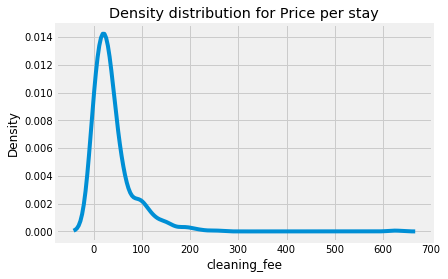

In [69]:
# let's see if the cleaning fees in our dataset present a distorted distribution
sns.kdeplot(df['cleaning_fee'].sample(500))
plt.title("Density distribution for Price per stay")
plt.show()

We can also pass the `.skew()` method to our dataframe and get a sense of how distorted our variables might be.

In [71]:
df[['cleaning_fee', 'security_deposit']].sample(500).skew()

cleaning_fee       5.870
security_deposit   7.565
dtype: float32

SciPy has convenient skew formula in the stats library as well.

In [72]:
from scipy.stats import skew

In [74]:
df['extra_people'].skew()

5.1376295

In [73]:
print("Extra People Skewness is %.2f" % skew(df['extra_people']))

Extra People Skewness is 5.14


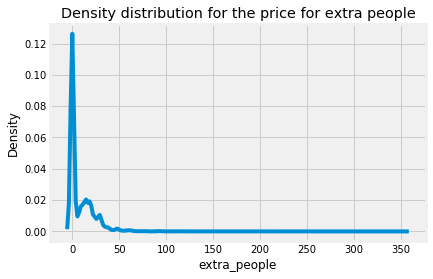

In [76]:
sns.kdeplot(df['extra_people'])
plt.title("Density distribution for the price for extra people")
plt.show()

## Kurtosis

Kurtosis is a very useful statistic that tells us how much do the tails of the distribution of a random variable differ from those of a normal distribution (e.g. a true bell-shaped curve). It tells us if we have extreme values or not in our variable.

The kurtosis of a normal distribution is usually at a value of 3. A much higher kurtosis than this means that we are dealing with outliers. On the other hand, a lower kurtosis means that the distribution we are dealing with has less extreme values than those seen in a normaly distributed array of data.

![example_kurt](https://anuradhasaha.weebly.com/uploads/5/4/4/1/54419337/kurtosis2.jpg)  
**Source:** image author, [Anuradha Saha](https://anuradhasaha.weebly.com/)

Formula:

$Kurtosis = \frac{1}{n} \sum_{i=1}^{n} (\frac{x_{i} - \overline{x}}{n - 1})\sigma^4$

In the folmula above, 
- $\overline{x}$ stands for the mean
- $n$ is the lenght of the array, vector, set, or list
- The greek letter $\sum$ denotes sumation
- $x_{i}$ means every `x` value in our array starting from `i=1`
- $\sigma^3$ --> standard deviation to the cube

Our pandas dataframe has two methods to calculate the Kurtosis. `.kurt()` and `.kurtosis()`. They both return the same output.

**NB.** There is a great medium article on skewness and kurtosis that you can find [here](https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85).

In [77]:
some_numerical_vars

['bathrooms',
 'price',
 'extra_people',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [78]:
df[some_numerical_vars].kurt()

bathrooms                  249.995
price                      233.683
extra_people                64.371
minimum_nights_avg_ntm    2066.698
maximum_nights_avg_ntm   39727.145
dtype: float32

In [79]:
df[some_numerical_vars].kurtosis() == df[some_numerical_vars].kurt()

bathrooms                 True
price                     True
extra_people              True
minimum_nights_avg_ntm    True
maximum_nights_avg_ntm    True
dtype: bool

In [80]:
from scipy.stats import kurtosis

In [81]:
print("Cleaning fee Kurtosis %.2f" % kurtosis(df['cleaning_fee']))

Cleaning fee Kurtosis 781.77


# Relationships

As data analysts we want to be able to determine how does one variable changes or moves in relation to another. We can do this visually using quantitative variables and scatter plots or with some handy mathematical functions that we can either create ourselves, or use from libraries like NumPy and SciPy. Let's begin by talking about correlation.

**Correlation** is a measure of how strongly related two variables are with one another. It gives us a way of quantifying the similarity, disimilarity, or lack-therof between variables. The value of the correlation between two variables goes from -1 to 1, where 1 means positively correlated, -1 means negatively correlated, and 0 means no correlation whatsoever. This value is derived by calculating the **Pearson Correlation Coefficient**, among other measures.

![corr](https://www.investopedia.com/thmb/PXAx5y_OS5z7n-Rn9m--QOC29rw=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/TC_3126228-how-to-calculate-the-correlation-coefficient-5aabeb313de423003610ee40.png)  
**Source:** [Investopedia](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp)

The correlation between two or more variables can be best observed through visualisations such as scatter plots and they can also be directly computed by hand or by using different functions in Python. The mathematical formula is:

$r_{xy}=\dfrac {\sum \left( x_{i}-\overline {x}\right) \left( y_{i}-\overline {y}\right) }{\sqrt {\sum \left( x_{i}-\overline {x}\right) ^{2}\sum \left( y_{i}-\overline {y}\right) ^{2}}}$


Where

- $r_{xy}$ is the relationship between the variables X and Y
- $x_{i}$ is every element in array X
- $y_{i}$ is every element in array Y
- $\overline {x}$ is the mean of array X
- $\overline {y}$ is the mean of array Y

For the correlation, we are dividing the covariance between the product of the standard deviations of each array. More on covariance below.

In [82]:
# let's create some columns for our prices
prices = df['price']
clean_fee = df['cleaning_fee']

mean_price = prices.mean()
mean_clean = clean_fee.mean()
mean_price, mean_clean

(188.6138153076172, 37.70492935180664)

In [83]:
# let's sum up the product of the differences between the elements in each array and their mean
arrays_diff_sum = sum((prices - mean_price) * (clean_fee - mean_clean))
arrays_diff_sum

172615589.80086443

In [84]:
# let's now compute the square root of the sum of the squared difference between each of the 
# elements in an array and its mean
diff_sqrt = np.sqrt(sum((prices - mean_price)**2) * sum((clean_fee - mean_clean)**2))
diff_sqrt

994642407.5383716

In [85]:
r_xy = arrays_diff_sum / diff_sqrt
print("The correlation between regular prices per stay and the cleaning fees is: %.3f" % r_xy)

The correlation between regular prices per stay and the cleaning fees is: 0.174


In [86]:
# you can conveniently call the pandas method .corr with two Series as well and achieve the same result
print("Correlation between prices per stay and the cleaning fees is: %.3f" % prices.corr(clean_fee))

Correlation between prices per stay and the cleaning fees is: 0.174


The `pearsonr()` function from scipy stats will also give you the pearson correlation plus the p-value of the arrays. The P-value is the probability that you would have found the current result in another similar sample if the correlation was in fact zero. Think about this as the least likely chance to see another value like the one we got.

In [87]:
from scipy.stats import pearsonr

In [88]:
pearsonr(prices, clean_fee)[0]

0.17354537522447597

In [ ]:
df.head()

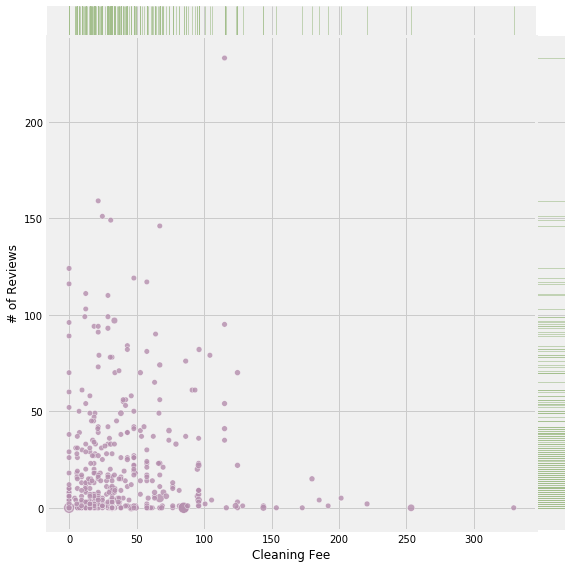

In [89]:
sample_data = df.sample(500)

g = sns.JointGrid(x='cleaning_fee', y='number_of_reviews', data=sample_data, space=0, ratio=17, height=8)

g.plot_joint(sns.scatterplot, size=sample_data["price"], sizes=(30, 120),
             color="#B48EAD", alpha=.8, legend=False)

g.plot_marginals(sns.rugplot, height=1, color="#A3BE8C", alpha=.6);

g.set_axis_labels(xlabel='Cleaning Fee', ylabel='# of Reviews');

**Covariance:** this statistic tells us how two variables vary together. That is, how does the variation of one variable relates to the variation of another.

We can calculate the covariance of two arrays X and Y by first computing the distance between the mean and each of the values within the arrays. `dx` below represents the distance of each value `x` from its mean. The same is true for the `dy`.

$dx = x_{i} - \overline {x}$  
$dy = y_{i} - \overline {y}$


Lastly, we multiply each distance from both arrays, add the resulting values, and then divide by the lenght of one of the arrays (which have to be both of the same length).

$cov\left( X,Y\right) =\dfrac {1}{n}\sum dx_{i}dy_{i}$

If both arrays variate in the same direction, the result will be positive. If their variations are completely unrelated, we are likely to get a 0. If both arrays variate negatively, the result will be negative. This is also visible when the a corresponding value in each array is below or above the mean. In this instance, the latter would be positive and former negative.

Both numbers tend to scale with each other. A large positive covariance means that if x is large then y is large as well, and when x is small then y is small as well. If the covariance between arrays is 0, there is no relationship whatsoever between them.

In [90]:
prices.shape

(39742,)

In [91]:
# let's make sure both have the same lenght
prices.shape[0] == clean_fee.shape[0]

True

In [92]:
# np.dot takes the products of two elements and sums them up
np.dot((prices - prices.mean()), (clean_fee - clean_fee.mean())) / len(prices)

4343.404705371255

In [93]:
sum((prices - prices.mean()) * (clean_fee - clean_fee.mean())) / len(prices)

4343.404705371256

Notice that Pearson Correlation only measures whether there is a linear relationship between the variables in question. This mean, that the relationship could be other than linear, hence, no relationship in the Pearson's test doesn't mean that there is no relationship at all.

One of the flaws of pearson correlation is that it does not deal well with outliers. There are other methods available for determining non-linear relationships that do deal with outliers, but we won't cover those here. These are the Spearman Rank Correlation test and the Kendall Correlation test.

# Cross-tabulating and Visualising Data

Another way to use descriptive statistics to gain deeper insights from a particular dataset is by cross-tabulating its variables. This technique allows us to aggregate and observe data based on distinct variables sitting on top of one another (columns) or standing next to each other (rows).

You have already seen a bit of cross-tabulation in previous lessons and provably while using a spreadsheet software, but let's dig a bit deeper into how to use these tools.

In [94]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,first_review,last_review,latitude,longitude,bathrooms,price,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,accommodates,guests_included,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,bedrooms,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_listings_count,host_total_listings_count,security_deposit,review_scores_checkin,reviews_per_month,host_response_rate,host_acceptance_rate,review_scores_rating,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_communication,review_scores_location,cleaning_fee
12602,41601240,https://www.airbnb.com/rooms/41601240,20200625032351,2020-06-26,5 min Sta.!!Easy access to Ueno/Akihabara☆max6...,Located in a real residential area where the n...,"Welcome to Tabata, Tokyo! The apartment is lo...",Located in a real residential area where the n...,none,It says that many super famous Japanese author...,I'll send the guidance of the way to the apart...,★Closest stations★ ･田端駅(Tabata Sta.) - 山手線(Ya...,You have full access to the apartment. Nothin...,I live in different apartment in TOKYO. If yo...,Unknown,https://a0.muscache.com/im/pictures/03bcbfe3-6...,287699302,https://www.airbnb.com/users/show/287699302,Nana,2019-08-21,JP,Hey I’m Nana.\r\nThanks for taking the time to...,within an hour,t,https://a0.muscache.com/im/pictures/user/1de4e...,https://a0.muscache.com/im/pictures/user/1de4e...,"['email', 'phone', 'offline_government_id', 's...",t,f,"Kita City, Tōkyō-to, Japan",Kita Ku,Kita City,Tōkyō-to,114-0014,Tokyo,"Kita City, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Washer,""Sm...",2,1125,4 weeks ago,t,2020-06-26,t,t,f,strict_14_with_grace_period,f,f,2020-01-30,2020-03-30,35.735,139.758,1.000,479.510,0.000,7.300,1125.000,6,1,2,30,1125,1125,15,45,75,349,4,4,7,7,2,3,0,0,7,7,0.000,10.000,0.810,100.000,100.000,100.000,10.000,9.000,10.000,10.000,10.000,134.400
1171,16008291,https://www.airbnb.com/rooms/16008291,20200625032351,2020-06-26,4min Shinjuku st/Cozy&Clean/2min walk JR Okubo...,OPENING SALE!!! IN WINTER 2016 My apartment i...,☆This my new apartment is located amazing plac...,OPENING SALE!!! IN WINTER 2016 My apartment i...,none,Unknown,Notice: I DON'T ACCEPT ANY BABYS. PLEASE KEEP ...,JR OKUBO station>>>>2min walk JR SHIN-OKUBO st...,Entire room.,"Basically, I would like to meet you and give t...","Please relax at your home in Tokyo, but please...",https://a0.muscache.com/im/pictures/139b4b2c-c...,98770436,https://www.airbnb.com/users/show/98770436,Tom,2016-10-08,"Shinjuku, Tokyo, Japan","Hi Everyone,\r\nThank you for visiting my list...",within an hour,t,https://a0.muscache.com/im/pictures/user/6bf41...,https://a0.muscache.com/im/pictures/user/6bf41...,"['email', 'phone', 'reviews']",t,f,"Shinjuku-ku, Tōkyō-to, Japan",Shinjuku Ku,Shinjuku-ku,Tōkyō-to,169-0074,Tokyo,"Shinjuku-ku, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",1,20,4 weeks ago,t,202

In [95]:
df.shape

(39742, 95)

## Pivot Tables

Let's look at the comparison between prices charged by super hosts and prices charged by non superhosts per different countries. We will do so by using a pivot table for our aggregation method. The most important arguments of a `pivot_table` are
- `values` --> what we want to aggregate (single column or list of columns). Usually a quantitative variable
- `index` --> what we want to represent in the rows (single column or list of columns). Usually a categorical variable or a date one
- `columns` --> what we want to represent in our columns (single column or list of columns). Usually a categorical variable
- `aggfunc` --> the aggregation method we want to use (single method or list of methods)

In [96]:
super_country_hosts = df.pivot_table(
        values='price',
        index='country',
        columns='host_is_superhost',
        aggfunc='mean'
)

super_country_hosts

host_is_superhost,f,t
country,,
Belgium,169.333,99.479
Japan,291.762,218.578
South Africa,145.409,131.301


In [99]:
super_country_hosts['t']

country
Belgium         99.479
Japan          218.578
South Africa   131.301
Name: t, dtype: float32

Because the output of a `pivot_table` is essentially a reduced dataframe, we can use the plot method from pandas to visualise our results.

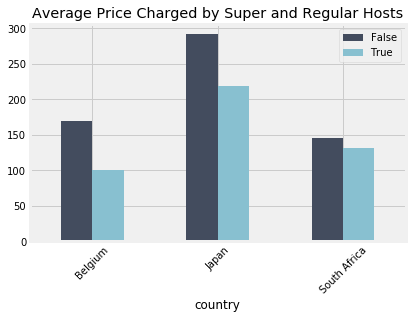

In [100]:
super_country_hosts.plot(kind='bar', title='Average Price Charged by Super and Regular Hosts', rot=45, color=['#434C5E', '#88C0D0'])
plt.legend(['False', 'True'])
plt.show()

In [101]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verific

In [102]:
super_hosts = df.pivot_table(
        values='price',
        index='room_type',
        columns='host_is_superhost',
        aggfunc=['mean', 'count', 'median']
)

super_hosts

mean          count       median       
host_is_superhost       f       t      f     t      f      t
room_type                                                   
Entire home/apt   230.057 182.776  21495  8898 96.317 98.411
Hotel room        174.524 401.853    813   238 92.735 95.832
Private room       89.552  69.585   6036  1673 43.234 43.037
Shared room        45.695  67.595    445   144 28.694 28.694

In [107]:
super_hosts.loc[:, 'mean'].loc[:, 't']

room_type
Entire home/apt   182.776
Hotel room        401.853
Private room       69.585
Shared room        67.595
Name: t, dtype: float32

Upon first inspection it seems as if the most 

In [108]:
cancel_super_host = df.pivot_table(
    index='property_type',
    values='price',
    columns='host_is_superhost',
    aggfunc='median'
)

cancel_super_host

host_is_superhost,f,t
property_type,,
Aparthotel,128.078,144.470
Apartment,80.210,92.982
Barn,23.304,221.256
Bed and breakfast,61.823,58.522
Boat,247.109,nan
Boutique hotel,105.427,154.219
Bungalow,73.485,67.376
Bus,23.508,nan
Cabin,41.709,56.949


In [109]:
# we can also perform operations with the reduced pivot table
cancel_super_host['diff'] = cancel_super_host['t'] - cancel_super_host['f']
cancel_super_host

host_is_superhost,f,t,diff
property_type,,,
Aparthotel,128.078,144.470,16.392
Apartment,80.210,92.982,12.772
Barn,23.304,221.256,197.952
Bed and breakfast,61.823,58.522,-3.302
Boat,247.109,nan,nan
Boutique hotel,105.427,154.219,48.792
Bungalow,73.485,67.376,-6.108
Bus,23.508,nan,nan
Cabin,41.709,56.949,15.240


We can also explore very complex interactions within the data.

In [111]:
identity_price = df.pivot_table(index=['host_is_superhost', 'country'], 
                                values=['price', 'cleaning_fee'], 
                                columns=['host_identity_verified', 'instant_bookable'],
                                aggfunc=['count', 'mean'])

identity_price

count                                \
                               cleaning_fee                   price         
host_identity_verified                    f           t           f         
instant_bookable                          f     t     f     t     f     t   
host_is_superhost country                                                   
f                 Belgium               521   742   358   197   521   742   
                  Japan                1533  6586   431  1140  1533  6586   
                  South Africa         5902  7345  2458  1576  5902  7345   
t                 Belgium               135   175   144    71   135   175   
                  Japan                 731  2897   464   797   731  2897   
                  South Africa         1638  1823  1104   974  1638  1823   

                                                   mean                       \
                                           cleaning_fee                        
host_identity_verified             t                  f             t          
instant_bookable                   f     t            f      t      f      t   
host_is_superhost country                                                      
f                 Belgium        358   197       27.886 35.951 45.034 37.466   
                  Japan          431  1140       74.025 58.391 71.013 57.993   
                  South Africa  2458  1576       23.569 18.965 25.631 21.541   
t                 Belgium        144    71       26.764 33.055 29.541 26.378   
                  Japan          464   797       65.395 66.438 54.340 64.121   
                  South Africa  1104   974       24.849 20.909 27.228 23.243   

                                                                
                                 price                          
host_identity_verified               f               t          
instant_bookable                     f       t       f       t  
host_is_superhost country                                       
f                 Belgium       96.054 202.010 114.697 339.339  
                  Japan        159.319 340.773 121.152 251.217  
                  South Africa 167.939 126.776 163.540 119.594  
t                 Belgium      100.397 105.208  94.041  94.644  
                  Japan        155.023 260.179 116.842 184.884  
                  South Africa 139.726  96.406 156.619 153.745

I found that Japan has about 1500 listings from non-identified regular hosts whose listings are not instantly bookable.

In [118]:
identity_price['count']['price']['f']['f'].loc['f', :].loc['f', :]

country
Belgium          521
Japan           1533
South Africa    5902
Name: f, dtype: int64

In [119]:
identity_price.loc['f', ('count', 'price', 'f', 'f')]

country
Belgium          521
Japan           1533
South Africa    5902
Name: (count, price, f, f), dtype: int64

As a side note. It would also be interesting to see whether there is a big gap between the distribution of reviews received by super hosts and regular hosts, and across rooms.

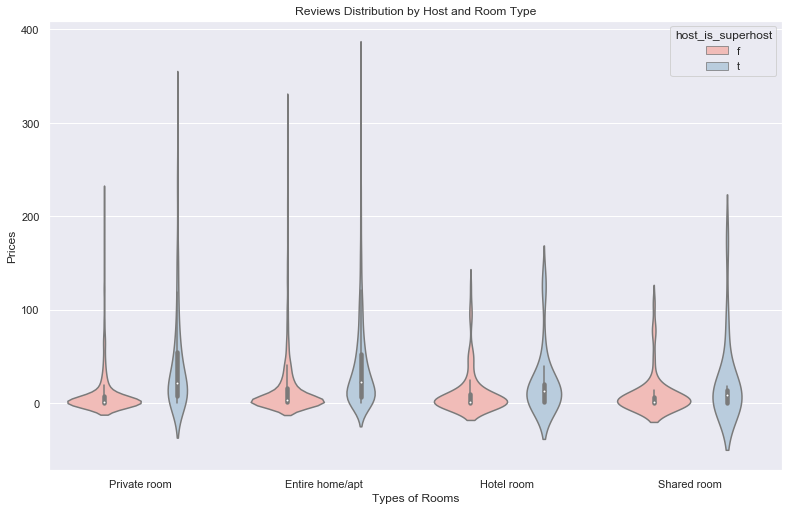

In [120]:
sns.set('notebook')
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.violinplot(x="room_type", 
               y="number_of_reviews", 
               hue="host_is_superhost", 
               data=df.sample(5000), 
               palette="Pastel1")
plt.title("Reviews Distribution by Host and Room Type")
plt.xlabel("Types of Rooms")
plt.ylabel("Prices")
plt.show()

## GroupBy

To understand groups better, we cam create a multi-index object using the pandas method `.grouby()`. This method is another useful tool for aggregating data and one that you might end up using a lot for data analysis with Python. Its mechanics are a bit different than that of `pivot_tables` but the results are almost the same. How does `.groupby()` works then

1. We first call the method on our data, e.g. `df.groupby`
2. We then select the variable or variables (as a list if multiple) that we would like to split our data by, e.g. `df.groupby('cars')` or `df.groupby(['cars', 'cylinders'])`
3. We now have a lazy `groupby` object from which we can select columns and aggregation methods for, e.g. `df.groupby('cars')['km_per_galons'].mean()` would give us the average kilometers per gallons by car brand
4. We can also specify multiple aggregation functions for a column, or specific aggregation methods for each columns (e.g. as a dictionary `{'column': 'mean'}`) using the `.agg()` method after the a specific columns or the `groupby` object itself

You can learn more about the awesome `groupby` through the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [121]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,calendar_last_scraped,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,first_review,last_review,latitude,longitude,bathrooms,price,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,accommodates,guests_included,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,bedrooms,beds,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_listings_count,host_total_listings_count,security_deposit,review_scores_checkin,reviews_per_month,host_response_rate,host_acceptance_rate,review_scores_rating,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_communication,review_scores_location,cleaning_fee
12602,41601240,https://www.airbnb.com/rooms/41601240,20200625032351,2020-06-26,5 min Sta.!!Easy access to Ueno/Akihabara☆max6...,Located in a real residential area where the n...,"Welcome to Tabata, Tokyo! The apartment is lo...",Located in a real residential area where the n...,none,It says that many super famous Japanese author...,I'll send the guidance of the way to the apart...,★Closest stations★ ･田端駅(Tabata Sta.) - 山手線(Ya...,You have full access to the apartment. Nothin...,I live in different apartment in TOKYO. If yo...,Unknown,https://a0.muscache.com/im/pictures/03bcbfe3-6...,287699302,https://www.airbnb.com/users/show/287699302,Nana,2019-08-21,JP,Hey I’m Nana.\r\nThanks for taking the time to...,within an hour,t,https://a0.muscache.com/im/pictures/user/1de4e...,https://a0.muscache.com/im/pictures/user/1de4e...,"['email', 'phone', 'offline_government_id', 's...",t,f,"Kita City, Tōkyō-to, Japan",Kita Ku,Kita City,Tōkyō-to,114-0014,Tokyo,"Kita City, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Washer,""Sm...",2,1125,4 weeks ago,t,2020-06-26,t,t,f,strict_14_with_grace_period,f,f,2020-01-30,2020-03-30,35.735,139.758,1.000,479.510,0.000,7.300,1125.000,6,1,2,30,1125,1125,15,45,75,349,4,4,7,7,2,3,0,0,7,7,0.000,10.000,0.810,100.000,100.000,100.000,10.000,9.000,10.000,10.000,10.000,134.400
1171,16008291,https://www.airbnb.com/rooms/16008291,20200625032351,2020-06-26,4min Shinjuku st/Cozy&Clean/2min walk JR Okubo...,OPENING SALE!!! IN WINTER 2016 My apartment i...,☆This my new apartment is located amazing plac...,OPENING SALE!!! IN WINTER 2016 My apartment i...,none,Unknown,Notice: I DON'T ACCEPT ANY BABYS. PLEASE KEEP ...,JR OKUBO station>>>>2min walk JR SHIN-OKUBO st...,Entire room.,"Basically, I would like to meet you and give t...","Please relax at your home in Tokyo, but please...",https://a0.muscache.com/im/pictures/139b4b2c-c...,98770436,https://www.airbnb.com/users/show/98770436,Tom,2016-10-08,"Shinjuku, Tokyo, Japan","Hi Everyone,\r\nThank you for visiting my list...",within an hour,t,https://a0.muscache.com/im/pictures/user/6bf41...,https://a0.muscache.com/im/pictures/user/6bf41...,"['email', 'phone', 'reviews']",t,f,"Shinjuku-ku, Tōkyō-to, Japan",Shinjuku Ku,Shinjuku-ku,Tōkyō-to,169-0074,Tokyo,"Shinjuku-ku, Japan",JP,Japan,t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",1,20,4 weeks ago,t,202

In [122]:
# first groupby
group_rooms = df.groupby('room_type')
group_rooms

In [123]:
# select one column
a_column = group_rooms['accommodates']
a_column

In [124]:
# perform a computation on the column
a_column.max()

room_type
Entire home/apt    20
Hotel room         16
Private room       16
Shared room        16
Name: accommodates, dtype: int32

In [128]:
# you can call other pandas functions on that same column
# here is the percentage of people each room accommodates
a_column.value_counts(normalize=True)

room_type        accommodates
Entire home/apt  2              0.277
                 4              0.248
                 6              0.129
                 3              0.103
                 8              0.069
                 5              0.059
                 10             0.030
                 7              0.028
                 12             0.013
                 9              0.013
                 16             0.010
                 1              0.007
                 11             0.005
                 14             0.004
                 13             0.003
                 15             0.002
                 18             0.000
                 20             0.000
Hotel room       2              0.367
                 1              0.233
                 4              0.148
                 3              0.104
                 6              0.060
                 5              0.026
                 16             0.018
                 7  

In [129]:
# you can also describe a column by the categories of your groupby object
group_rooms['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,30393.000,216.213,578.488,0.000,58.862,96.317,185.162,17812.729
Hotel room,1051.000,226.003,764.297,12.298,49.237,94.154,162.221,8639.712
Private room,7709.000,85.219,392.382,0.000,27.827,43.037,73.731,18510.555
Shared room,589.000,51.049,115.072,8.576,21.287,28.694,37.910,1228.531


In [130]:
# in addition, you can be as specific as you want when specifying your aggregation methods
group_rooms['cleaning_fee'].agg(['mean', 'count', 'max', 'min', 'var', 'std'])

,mean,count,max,min,var,std
room_type,,,,,,
Entire home/apt,43.236,30393,3146.040,0.000,2016.500,44.905
Hotel room,13.538,1051,288.000,0.000,1033.311,32.145
Private room,21.248,7709,2468.000,0.000,1960.466,44.277
Shared room,10.802,589,291.300,0.000,415.174,20.376


In [131]:
# multiple columns will give you multiple levels between your columns and aggregations
group_rooms[['accommodates', 'beds']].agg(['mean', 'count', 'max', 'min', 'var', 'std'])

accommodates                              beds                 \
                        mean  count max min    var   std  mean  count max min   
room_type                                                                       
Entire home/apt        4.597  30393  20   1  7.711 2.777 2.721  30393  56   0   
Hotel room             3.035   1051  16   1  6.828 2.613 2.295   1051  36   0   
Private room           2.640   7709  16   1  4.520 2.126 1.802   7709  50   0   
Shared room            2.784    589  16   1 11.942 3.456 3.377    589  40   0   

                              
                   var   std  
room_type                     
Entire home/apt  4.417 2.102  
Hotel room       7.174 2.678  
Private room     7.873 2.806  
Shared room     20.062 4.479

In [132]:
# you can also get multiple levels on the indeces with the groupby call
rooms_cancel_policy = df.groupby(['room_type', 'cancellation_policy'])
rooms_cancel_policy['number_of_reviews'].max()

room_type        cancellation_policy        
Entire home/apt  flexible                       567
                 luxury_moderate                  0
                 luxury_super_strict_95           0
                 moderate                       480
                 strict                          22
                 strict_14_with_grace_period    546
                 super_strict_30                109
                 super_strict_60                143
Hotel room       flexible                       164
                 moderate                       407
                 strict_14_with_grace_period    222
                 super_strict_30                 17
                 super_strict_60                 16
Private room     flexible                       290
                 moderate                       373
                 strict                          15
                 strict_14_with_grace_period    319
                 super_strict_30                  8
Shared room      fl

In [133]:
# we can also aggregate specific columns
specific_group = df.groupby(['host_identity_verified', 'instant_bookable'])
specific_group.agg({
    'price':'mean',
    'cleaning_fee':'median',
    'security_deposit': 'max',
    'extra_people': 'min'
})

price  cleaning_fee  \
host_identity_verified instant_bookable                         
f                      f                156.903        27.765   
                       t                218.381        31.868   
t                      f                148.401        28.800   
                       t                177.821        30.788   

                                         security_deposit  extra_people  
host_identity_verified instant_bookable                                  
f                      f                         9255.000         0.000  
                       t                         5376.000         0.000  
t                      f                         5351.426         0.000  
                       t                         5259.715         0.000

## Exercise

- Create a pivot table with at least one index variable, two columns, and 3 aggregation methods.

## Exercise

- Create a pivot table with a multi-index, one quantitative variable as the values, and 1 aggregation method.

## Exercise

- Create a groupby object with 4 aggregation methods for 4 different columns.

## Exercise

- Create a groupby object with a 2-level index, 3 columns, and 1 aggregation method.

# 5. Summary

We have covered a lot in this module, so let's go over a few of the things we covered

- The three main branches of statistics, collecting, describing and inferring from data, at a high level
- A variety of techniques to deal with missing data
- The shape and form of how data, structured and unstructured, might be collected
- Different approaches for collecting data through sampling, observation and experimentation
- The characteristics of measures of central tendency and measures of variability and what each describes
- In-depth descriptive statistics and how to calculate these with plain Python
- We also covered a variety of aggregation, or cross-tabulation methods with `pivot_table()` and the `.groupby()` functions
    - The best way to think of `.groupby()` is by stating: _for each "category or group" I'm interested in, show me "x" column(s) aggregated by "z" method
    - The `pivot_table()` function provides us with a different kind of control over the way we cross-tabulate data

# 6. References

Herne, H., & Huff, D. (1973). _How to Lie with Statistics_. Applied Statistics, 22(3), 401. doi: 10.2307/2346789

Downey, Allen B. _Think Stats: Exploratory Data Analysis in Python_. Green Tea Press, 2014.

Lock, Robin H., et al. _Statistics: Unlocking the Power of Data_. John Wiley & Sons, 2019.

# 7. Feedback

We would really appreciate it if you could please provide us with your feedback from this module by filling out a couple of question.

> ## [Survey](https://docs.google.com/forms/d/e/1FAIpQLSex72vQxeZGB5OBooLJ_mDsSsdKw0vbejM-3zND2-i1fIBlSQ/viewform?usp=sf_link)